https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

https://www.tensorflow.org/tutorials/images/cnn?hl=pt-br

In [2]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


### Basic classification: Classify images of clothing

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
train_images[0].shape

(28, 28)

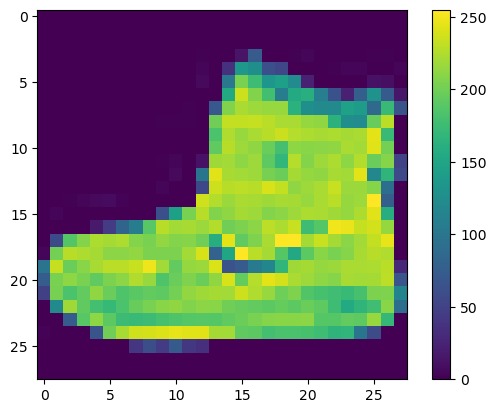

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

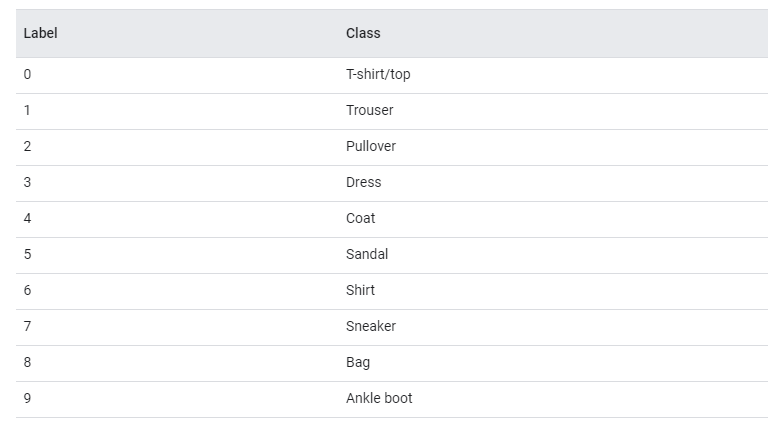

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
train_images = train_images / 255.0
test_images = test_images / 255.0

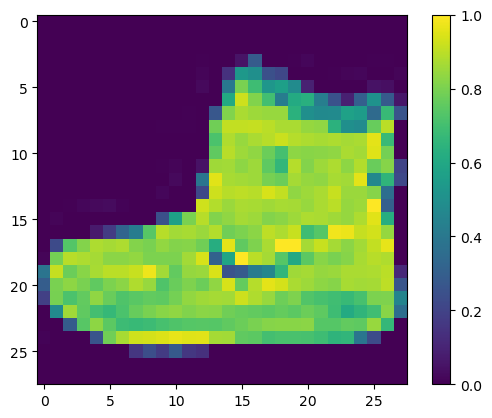

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

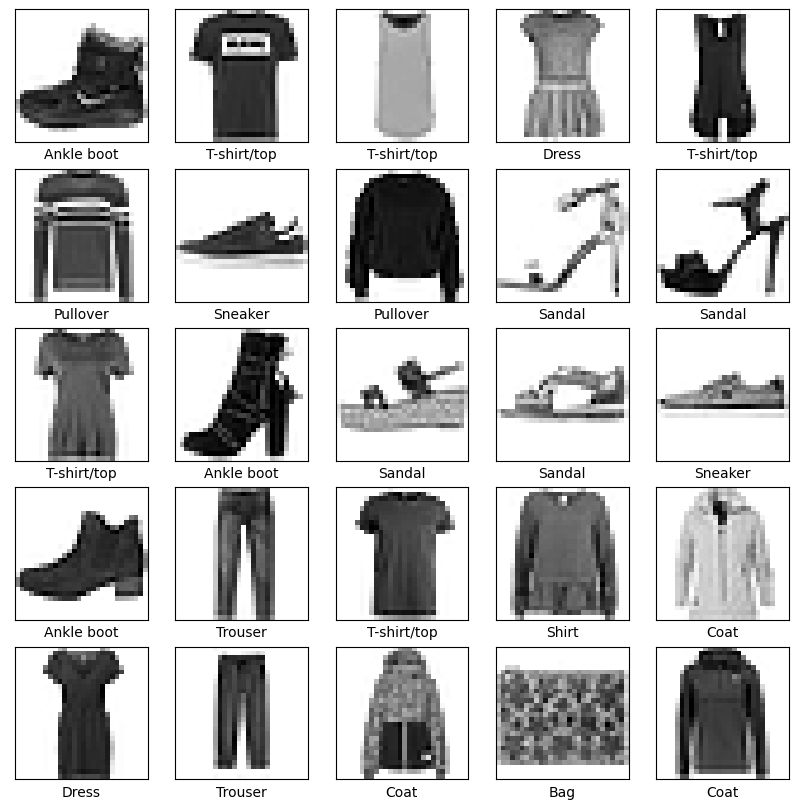

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Set up the layers

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
    tf.keras.layers.Dense(128, activation='relu'), #densely connected, # has 128 nodes (or neurons)
    tf.keras.layers.Dense(10) # densely connected # logits array with length of 10. Geralmente é usado a quant de classes
])

### Compile the model

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4956 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3724 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3352 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3109 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2915 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2778 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2664 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2535 - accuracy: 0.9060
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2458 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3338 - accuracy: 0.8860

Test accuracy: 0.8859999775886536


Repare que existe uma diferença entre o acc do treino e do teste. Nesse caso, isso é o overfitting.

In [31]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()]) # converte em probs

In [32]:
predictions = probability_model.predict(test_images)

In [36]:
predictions[0] # predição dessa imagem ser cada classe

array([7.9658807e-11, 1.6837374e-11, 4.8398590e-12, 5.6723515e-12,
       8.9546925e-11, 1.0401942e-04, 3.0547936e-10, 7.9667792e-03,
       3.1482921e-09, 9.9192917e-01], dtype=float32)

In [37]:
np.argmax(predictions[0]) #ankle boot, or class_names[9]

9

In [38]:
test_labels[0]

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

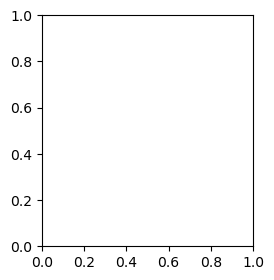

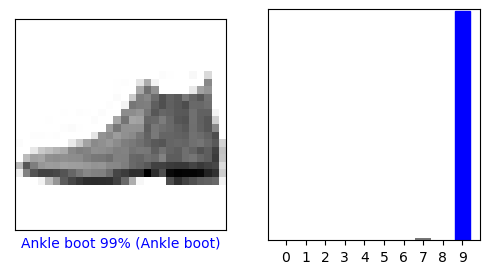

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

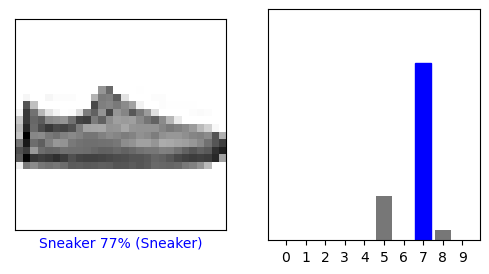

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

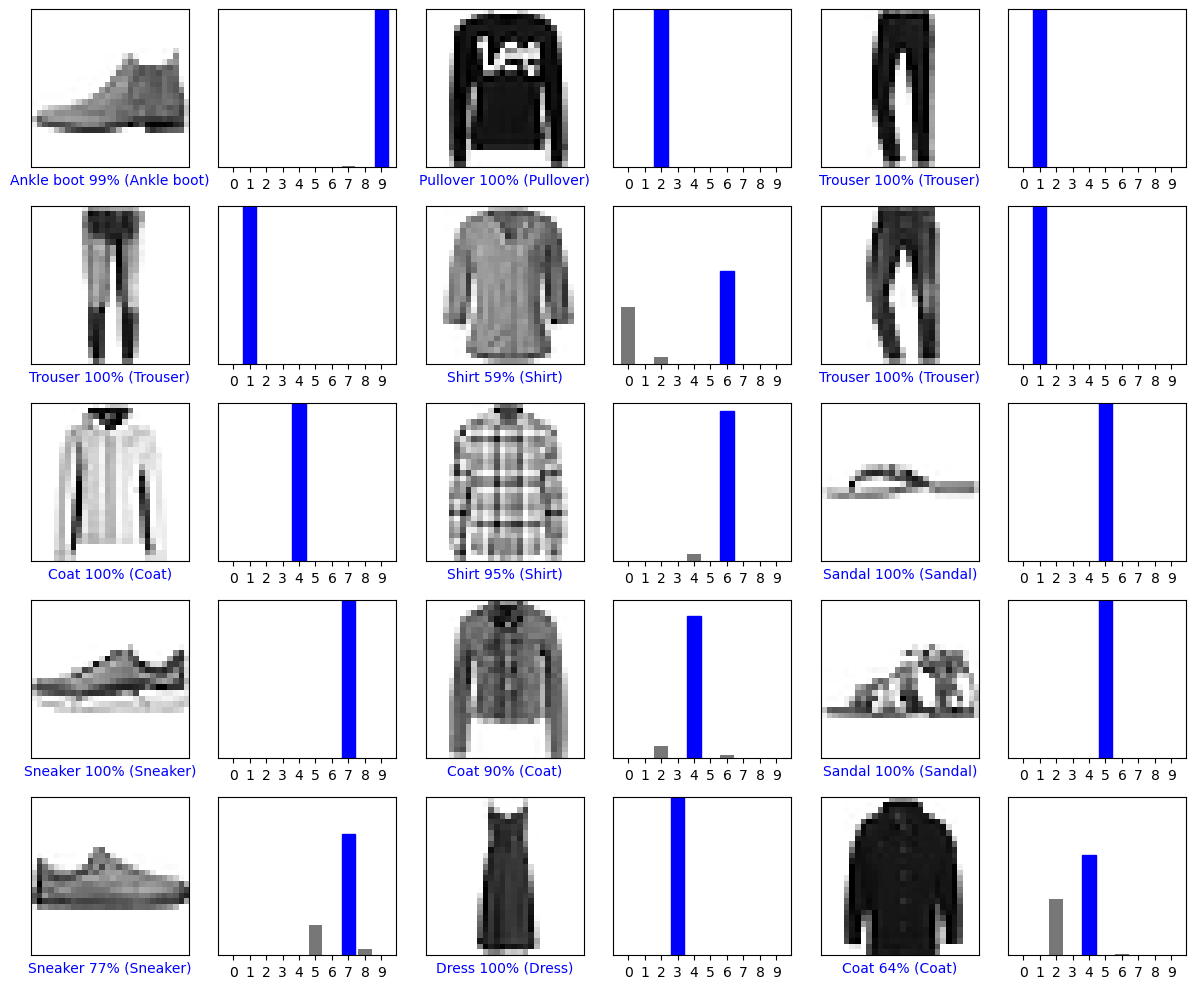

In [43]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [44]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [45]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [46]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.9096584e-05 9.8272890e-15 9.9932814e-01 1.8280093e-10 6.1492523e-04
  1.9700124e-13 2.7870694e-05 9.1800806e-16 4.9920645e-09 1.1106463e-14]]


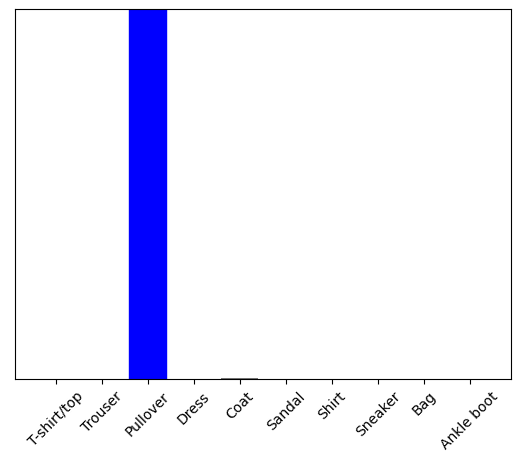

In [47]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [48]:
np.argmax(predictions_single[0])

2